**Unsupervised learning**

* Unsupervised learning finds patterns in data
* E.g. clustering customers by their purchases
* Compressing the data using purchase patterns (dimension reduction)

**Supervised vs unsupervised learning**

* Supervised learning finds pa!erns for a prediction task
* Unsupervised learning finds patterns in data ... but without a specific prediction task in mind



---



---



---



**K-Means:**

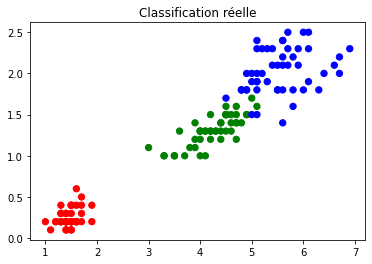

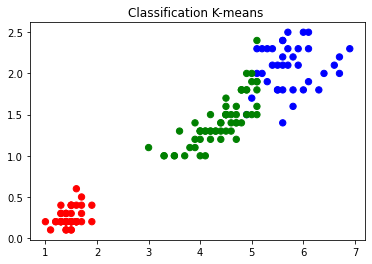

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets


#chargement de jeu des données Iris
iris = datasets.load_iris()

#importer le jeu de données Iris dataset à l'aide du module pandas
x = pd.DataFrame(iris.data)

x.columns = ['Sepal_Length','Sepal_width','Petal_Length','Petal_width']


y = pd.DataFrame(iris.target)


y.columns = ['Targets']


#Création d'un objet K-Means avec un regroupement en 3 clusters (groupes)
model=KMeans(n_clusters=3)

#application du modèle sur notre jeu de données Iris
model.fit(x)

colormap=np.array(['Red','green','blue'])

#Visualisation du jeu de données sans altération de ce dernier (affichage des fleurs selon leur étiquettes)
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)
plt.title('Classification réelle')
plt.show()

#Visualisation des clusters formés par K-Means
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')
plt.show()

**Inertia measures clustering quality**
* Measures how spread out the clusters are (lower is be!er)
* Distance from each sample to centroid of its cluster

In [2]:
print(model.inertia_)

78.851441426146


**The number of clusters**

* Clusterings of the iris dataset with different numbers of clusters
* More clusters means lower inertia
* What is the best number of clusters

![](https://drive.google.com/uc?export=view&id=1zE6KMMuh78Il7isiwC80Rv1tS7aylEHh) 

![](https://drive.google.com/uc?export=view&id=1zvkcYcCvpJ6z8fWKCLTFmajurTuQ7U2y) 




---



---



---





# Hierarchical clustering

![](https://drive.google.com/uc?export=view&id=1XojW7xr2JCLnKKMFph-B-6NhoMuiGg_Y) 


Read about HC, dendograms, etc [here](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/) 

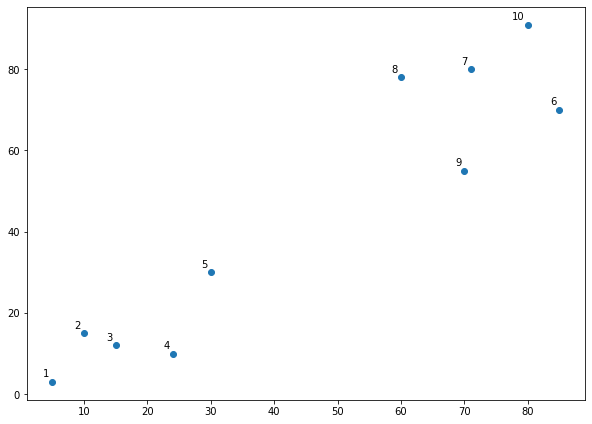

In [3]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

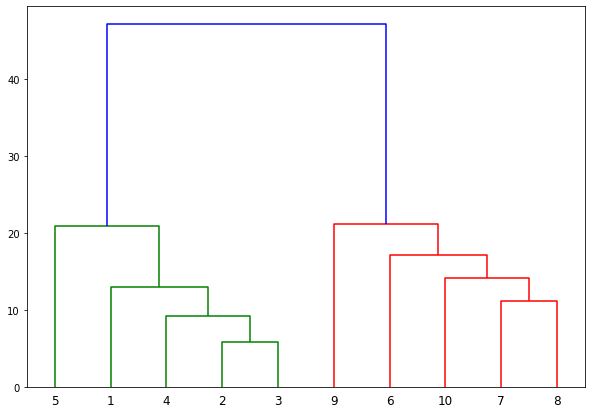

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [4]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)


[1 1 1 1 1 0 0 0 0 0]


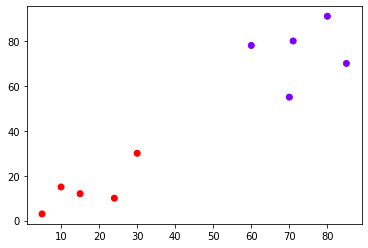

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [5]:
#3 clusters


cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster3.fit_predict(X)
print(cluster3.labels_)

[0 0 0 0 0 2 1 1 2 1]


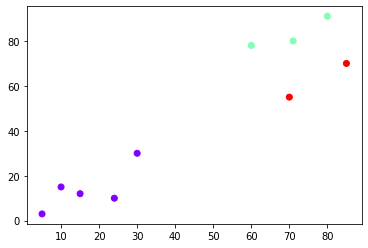

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster3.labels_, cmap='rainbow')

# Application:

Apply HC to the dataset shopping-data.csv

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from our dataset:

In [ ]:
from numpy.matrixlib import defmatrix
from google.colab import files
uploaded = files.upload()
customer_data = pd.read_csv("shopping-data.csv")
data =customer_data.iloc[:, 3:5].values

Saving shopping-data.csv to shopping-data (1).csv


In [ ]:
data.shape


(200, 2)

In [ ]:
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


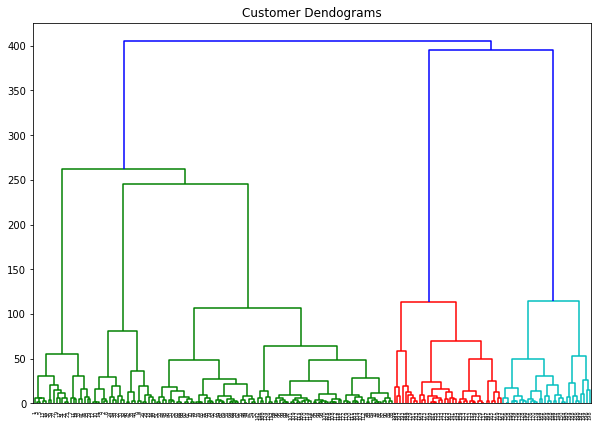

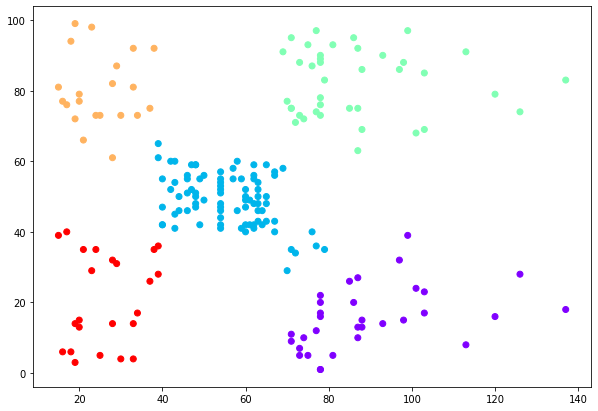

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')